In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

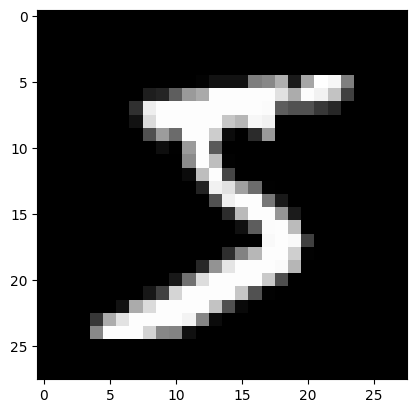

(28, 28)


In [6]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()
print(X_train[0].shape)

In [7]:
conv = Conv2D( 32, kernel_size = (3,3), strides = 1, padding = 'same', input_shape = (28,28,1))
conv( tf.constant(X_train[0].reshape(1,28,28,1), tf.float32) )

<tf.Tensor: shape=(1, 28, 28, 32), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 

In [8]:
conv = Conv2D( 32, kernel_size = (3,3), strides = 1,input_shape = (28,28,1))
conv( tf.constant(X_train[0].reshape(1,28,28,1), tf.float32) )

<tf.Tensor: shape=(1, 26, 26, 32), dtype=float32, numpy=
array([[[[  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         ...,
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ]],

        [[  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0.       ],
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
            0.       ,   0. 

In [9]:
from keras.layers import Dropout

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), strides = 1, input_shape = (28,28,1), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2))) # 데이터를 절반으로 줄여준다 (2,2)크기마다 최댓값을 추출해 해당 지역을 대표
model.add(Flatten()) # 데이터를 모두 펴주고
model.add(Dense(units = 64, activation = 'relu')) # 전형적인 딥러닝 방식으로 복귀
model.add(Dense(units = 10, activation = 'softmax')) # 다중 분류 문제임
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary() # 모델 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [11]:
y_train.shape

(60000,)

In [12]:
X_train.shape

(60000, 28, 28)

In [29]:
# 학습 진행
model.fit(x_train.reshape(-1,28,28,1), y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2689 - acc: 0.9525
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0536 - acc: 0.9838
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0376 - acc: 0.9885
Epoch 4/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0323 - acc: 0.9904
Epoch 5/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0250 - acc: 0.9922


In [ ]:
# Fashin Mnist에 적용해보자

In [62]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [68]:
X_train = X_train / 255.0
X_test = X_test / 255.0

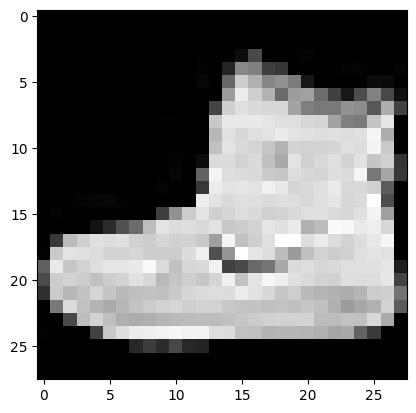

In [97]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

```
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
```

In [92]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (4,4), strides = 1, input_shape = (28,28,1), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (4,4), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten()) # 데이터를 모두 펴주고
model.add(Dropout(0.3))
model.add(Dense(units = 32, activation = 'relu')) # 전형적인 딥러닝 방식으로 복귀
model.add(Dense(units = 10, activation = 'softmax')) # 다중 분류 문제임
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary() # 모델 확인

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 16)        272       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 32)        8224      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dropout_1 (Dropout)         (None, 800)             

In [93]:
model.fit(X_train.reshape(-1,28,28,1), y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5466 - acc: 0.8020
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3710 - acc: 0.8655
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3269 - acc: 0.8816
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3008 - acc: 0.8895
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2819 - acc: 0.8967
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2679 - acc: 0.9013
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2593 - acc: 0.9050
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2500 - acc: 0.9083
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2395 - acc: 0.9118
Epoch 10/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2343 - acc: 0.9130


In [94]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [95]:
print(classification_report(y_train, model.predict(X_train).argmax(axis = 1), digits = 10))

1875/1875 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0  0.9089495508 0.8768333333 0.8926026468      6000
           1  0.9971404542 0.9880000000 0.9925491838      6000
           2  0.8956798392 0.8915000000 0.8935850317      6000
           3  0.9185505852 0.9548333333 0.9363406064      6000
           4  0.8717324241 0.8948333333 0.8831318365      6000
           5  0.9972895138 0.9811666667 0.9891623960      6000
           6  0.8112823988 0.7981666667 0.8046710913      6000
           7  0.9511139606 0.9890000000 0.9696870659      6000
           8  0.9913333333 0.9913333333 0.9913333333      6000
           9  0.9878715408 0.9638333333 0.9757044036      6000

    accuracy                      0.9329500000     60000
   macro avg  0.9330943601 0.9329500000 0.9328767595     60000
weighted avg  0.9330943601 0.9329500000 0.9328767595     60000



In [96]:
print(classification_report(y_test, model.predict(X_test).argmax(axis = 1), digits = 10))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0  0.8734567901 0.8490000000 0.8610547667      1000
           1  0.9928716904 0.9750000000 0.9838546922      1000
           2  0.8679435484 0.8610000000 0.8644578313      1000
           3  0.8885714286 0.9330000000 0.9102439024      1000
           4  0.8578528827 0.8630000000 0.8604187438      1000
           5  0.9898063201 0.9710000000 0.9803129732      1000
           6  0.7487335360 0.7390000000 0.7438349270      1000
           7  0.9294449671 0.9880000000 0.9578284052      1000
           8  0.9751243781 0.9800000000 0.9775561097      1000
           9  0.9823284823 0.9450000000 0.9633027523      1000

    accuracy                      0.9104000000     10000
   macro avg  0.9106134024 0.9104000000 0.9102865104     10000
weighted avg  0.9106134024 0.9104000000 0.9102865104     10000

